In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
%matplotlib inline
import time
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data.csv")
df['Date'] = df['Date'].astype("datetime64[ns]")
df = df.set_index("Date")

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [38]:
# separar colunas inteiras de decimais

int_cols = []
[int_cols.append(i) if (df[i].dtype == int) else None for i in df]

# frequencia absoluta
# frequencia relativa
# frequencia acumulada
# frequencia relativa acumulada

df.describe()

,Close,High,Low,Open,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,...,Low_labels,Close_PolyInter,Open_PolyInter,High_PolyInter,Low_PolyInter,parabolic_sar,weekday,High_bool__Low_bool,Close_bool__Open_bool,High_bool__Low_bool__Close_bool__Open_bool
count,13034.000000,13034.000000,13034.000000,13034.000000,1.303400e+04,1.303400e+04,1.303400e+04,13034.000000,1.303400e+04,13034.000000,...,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000
mean,22.002063,22.195134,21.797209,21.997204,1.011255e+07,1.821350e+09,3.368104e+09,0.034823,-6.965473e+04,52.459624,...,0.578947,0.998890,0.998895,0.998916,0.998884,21.920901,2.016188,0.047031,0.061915,0.052095
std,24.192384,24.381905,23.990673,24.188612,9.382908e+06,1.728478e+09,2.116790e+09,0.154760,4.287403e+06,14.974878,...,0.493747,0.041917,0.041827,0.041490,0.042084,24.142067,1.401285,0.883890,0.749487,0.692587
min,0.144723,0.145445,0.144002,0.145445,3.828000e+05,-1.499835e+08,-3.517120e+07,-0.548397,-1.075809e+08,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.354790,0.000000,-1.000000,-1.000000,-1.000000
25%,0.865072,0.872489,0.855648,0.864441,3.730000e+06,8.067764e+07,1.085503e+09,-0.071783,-4.560715e+04,42.124183,...,0.000000,0.990523,0.990596,0.990989,0.990681,0.865354,1.000000,-1.000000,-1.000000,0.000000
50%,8.510065,8.538575,8.445918,8.495812,7.259350e+06,1.483553e+09,3.830126e+09,0.035799,2.185089e+03,52.608688,...,1.000000,1.000466,1.000392,1.000381,1.000490,8.393005,2.000000,0.000000,0.000000,0.000000
75%,43.446830,43.995235,43.038338,43.507352,1.318655e+07,2.874829e+09,5.376809e+09,0.139288,1.817590e+05,62.791884,...,1.000000,1.010516,1.010310,1.009971,1.010427,43.156575,3.000000,1.000000,1.000000,1.000000
max,75.004890,75.277930,74.695898,75.033629,1.180235e+08,5.270917e+09,6.827799e+09,1.000000,4.738798e+07,100.000000,...,1.000000,1.100425,1.094777,1.079503,1.108501,75.277930,4.000000,1.000000,1.000000,1.000000


In [31]:
def slice_df(ax_df):
    df_desc = pd.DataFrame(ax_df.mean(), columns=['mean'])
    df_desc['median'] = ax_df.median()

    df_desc['min'] = ax_df.min()
    df_desc['quantile_20'] = ax_df.quantile(0.20)
    df_desc['quantile_25'] = ax_df.quantile(0.25)
    df_desc['quantile_44'] = ax_df.quantile(0.44)
    df_desc['quantile_60'] = ax_df.quantile(0.60)
    df_desc['quantile_75'] = ax_df.quantile(0.75)
    df_desc['quantile_88'] = ax_df.quantile(0.88)
    df_desc['max'] = ax_df.max()

    df_desc['std'] = ax_df.std()
    df_desc['skew'] = ax_df.skew()
    df_desc['kurtosis'] = ax_df.kurtosis()
    df_desc['variation'] = ax_df.var()
    return df_desc

df_desc = slice_df(df)
df_desc.head(5)

,mean,median,min,quantile_20,quantile_25,quantile_44,quantile_60,quantile_75,quantile_88,max,std,skew,kurtosis,variation
Close,2.200206e+01,8.510065e+00,0.144723,6.802449e-01,8.650722e-01,6.109211e+00,2.029216e+01,4.344683e+01,6.120813e+01,7.500489e+01,2.419238e+01,0.769256,-0.967384,5.852714e+02
High,2.219513e+01,8.538575e+00,0.145445,6.874113e-01,8.724885e-01,6.151349e+00,2.052714e+01,4.399524e+01,6.164945e+01,7.527793e+01,2.438190e+01,0.764550,-0.978505,5.944773e+02
Low,2.179721e+01,8.445918e+00,0.144002,6.709558e-01,8.556485e-01,6.073205e+00,2.004424e+01,4.303834e+01,6.077881e+01,7.469590e+01,2.399067e+01,0.773993,-0.956103,5.755524e+02
Open,2.199720e+01,8.495812e+00,0.145445,6.771346e-01,8.644405e-01,6.109214e+00,2.027598e+01,4.350735e+01,6.118202e+01,7.503363e+01,2.418861e+01,0.769414,-0.966822,5.850890e+02
Volume,1.011255e+07,7.259350e+06,382800.000000,3.200000e+06,3.730000e+06,6.195072e+06,9.368460e+06,1.318655e+07,2.034920e+07,1.180235e+08,9.382908e+06,2.406727,9.958013,8.803896e+13


In [47]:
df.corr().sort_values("Close").tail(10)

,Close,High,Low,Open,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,Close_bool,High_bool,Low_bool,Open_bool,Close_labels,Open_labels,High_labels,Low_labels,Close_PolyInter,Open_PolyInter,High_PolyInter,Low_PolyInter,parabolic_sar,weekday,High_bool__Low_bool,Close_bool__Open_bool,High_bool__Low_bool__Close_bool__Open_bool
volatility_kcl,0.999462,0.999491,0.999531,0.999560,0.594075,0.960446,0.836030,0.026743,-0.023597,-0.031337,-0.018599,-0.030157,-0.015437,0.861192,0.999868,0.814864,0.999616,0.998562,0.999458,0.032417,-0.046556,-0.031041,0.043329,0.999926,0.999715,1.000000,0.009958,-0.042811,-0.020919,0.039113,0.999410,0.998701,0.999608,0.015605,-0.016990,0.047229,0.059692,0.071401,-0.023843,0.999900,0.999338,0.999880,0.999553,0.014451,-0.198327,0.019627,-0.102883,-0.013314,-0.047525,-0.008951,-0.007739,-0.049428,-0.020190,-0.020629,-0.013348,-0.027067,0.999917,0.999384,0.999783,0.998358,0.995272,0.993837,0.003277,0.057005,-0.030490,0.999294,0.999262,-0.000303,0.004808,0.010819,-0.067713,0.010898,0.014875,0.018345,-0.084192,0.000207,-0.014422,-0.012679,-0.014422,0.045574,0.999790,-0.053376,-0.005222,-0.009727,0.004408,-0.012726,-0.019952,0.999462,-0.048173,-0.003610,-0.015528,-0.012538,-0.043302,-0.039882,-0.040279,-0.043632,0.022375,0.022684,0.023130,0.022154,0.999344,0.003480,-0.010805,-0.040395,-0.023704
momentum_kama,0.999474,0.999566,0.999459,0.999552,0.600434,0.960674,0.837767,0.024635,-0.025327,-0.033201,-0.017281,-0.034029,-0.013749,0.861589,0.999872,0.822152,0.999737,0.999003,0.999235,0.040000,-0.048436,-0.031012,0.042569,0.999882,0.999832,0.999790,0.021277,-0.041783,-0.020770,0.038225,0.999176,0.999181,0.999746,0.024118,-0.019457,0.057349,0.051495,0.062058,-0.021982,0.999879,0.999565,0.999908,0.999742,0.015606,-0.200715,0.022106,-0.105093,-0.011085,-0.049853,-0.010503,-0.003531,-0.051384,-0.020409,-0.025902,-0.018140,-0.028475,0.999861,0.999616,0.999870,0.998809,0.996006,0.994597,-0.001787,0.062051,-0.036250,0.999161,0.999375,0.000343,0.004023,0.009804,-0.070388,0.013494,0.017252,0.020181,-0.089330,-0.000054,-0.015403,-0.014420,-0.015403,0.037892,1.000000,-0.055422,-0.002259,-0.005339,0.003520,-0.012021,-0.019270,0.999474,-0.047782,-0.003137,-0.015047,-0.012065,-0.042189,-0.038873,-0.039409,-0.042256,0.022889,0.023349,0.023680,0.022817,0.999215,0.003479,-0.010266,-0.039820,-0.023138
volatility_kcc,0.999508,0.999604,0.999505,0.999602,0.600476,0.960876,0.837525,0.025603,-0.025551,-0.032478,-0.018624,-0.032792,-0.015146,0.861745,0.999953,0.821664,0.999757,0.999002,0.999277,0.039549,-0.047638,-0.031301,0.043533,1.000000,0.999931,0.999926,0.020029,-0.043445,-0.021631,0.039423,0.999162,0.999122,0.999708,0.023590,-0.017922,0.053903,0.056003,0.067606,-0.024255,0.999986,0.999514,0.999971,0.999716,0.015156,-0.199940,0.021494,-0.104392,-0.

Index(['trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index'],
      dtype='object')


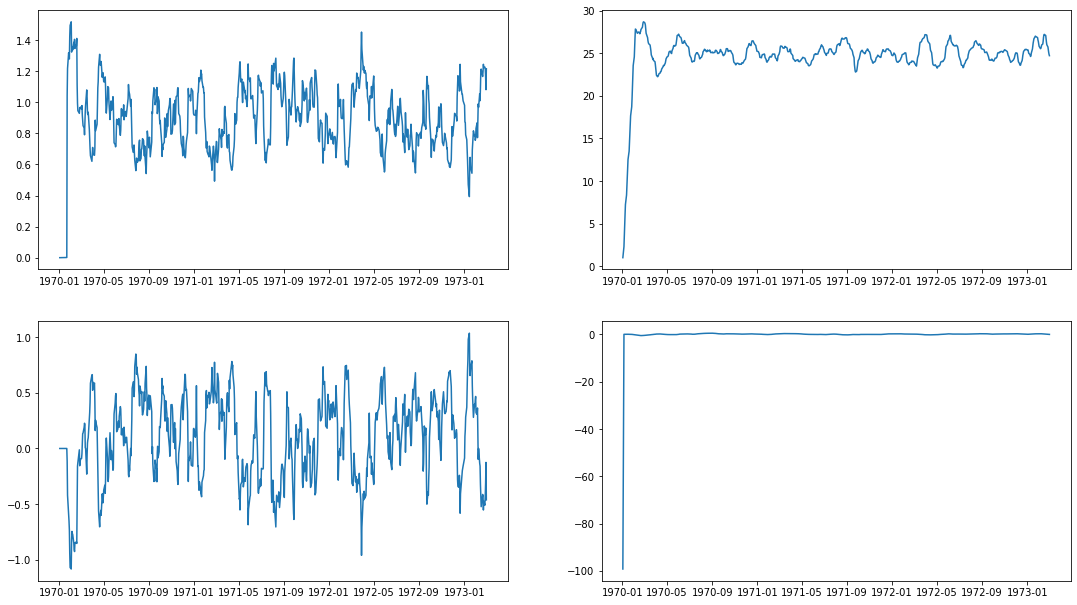

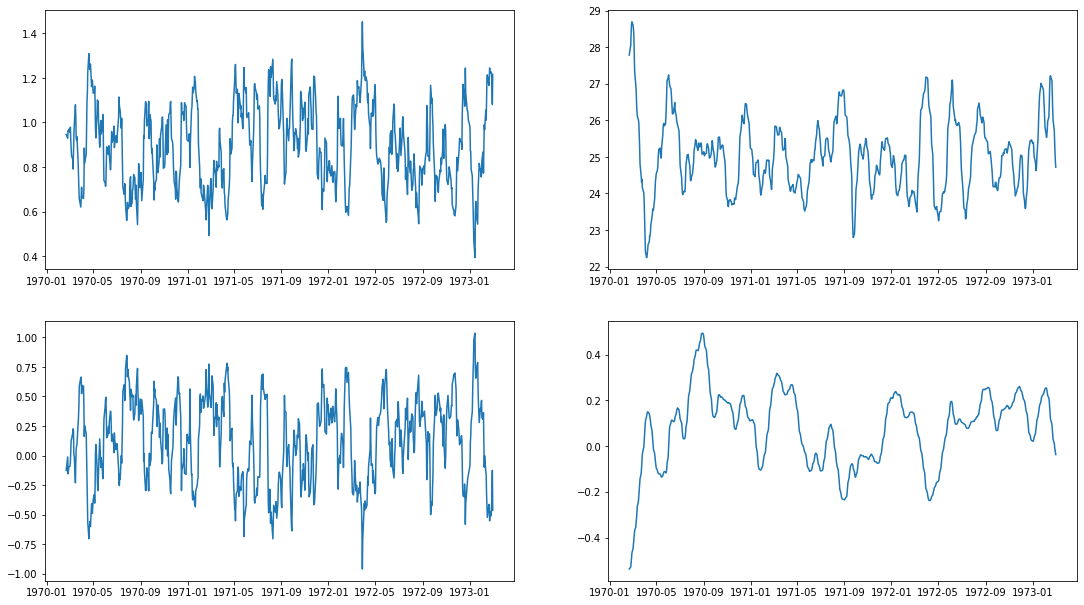

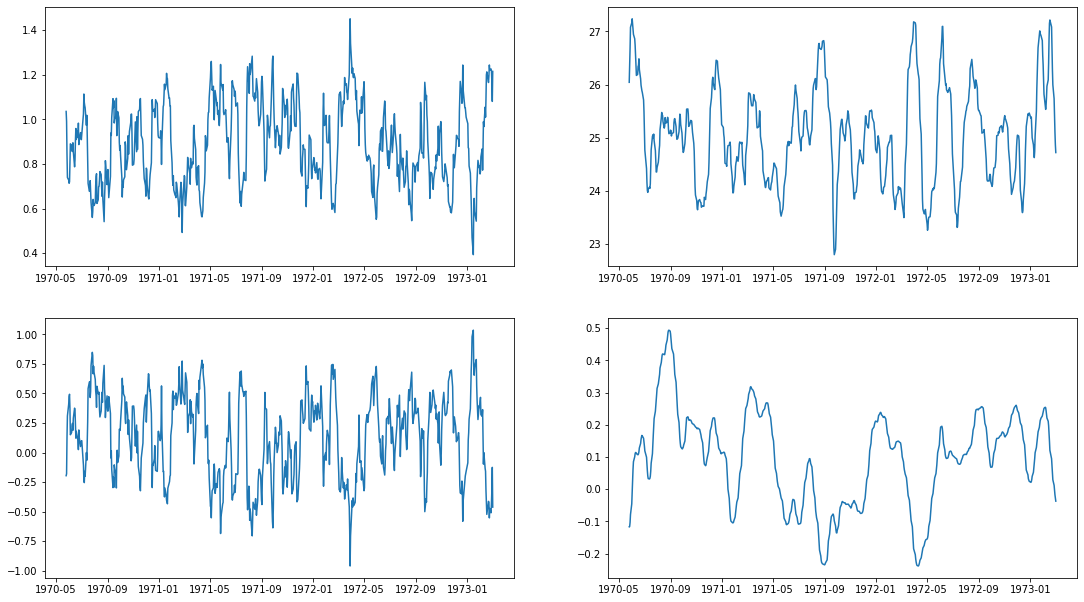

In [3]:
size = 48

print(df.columns[size: size + 4])

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

axs[0, 0].plot('Date', df.columns[size], data=df.iloc[0:800, :])
axs[1, 0].plot('Date', df.columns[size + 1], data=df.iloc[0:800, :])
axs[1, 1].plot('Date', df.columns[size + 2], data=df.iloc[0:800, :])
axs[0, 1].plot('Date', df.columns[size + 3], data=df.iloc[0:800, :])


fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

axs[0, 0].plot('Date', df.columns[size], data=df.iloc[35:800, :])
axs[1, 0].plot('Date', df.columns[size + 1], data=df.iloc[35:800, :])
axs[1, 1].plot('Date', df.columns[size + 2], data=df.iloc[35:800, :])
axs[0, 1].plot('Date', df.columns[size + 3], data=df.iloc[35:800, :])

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

axs[0, 0].plot('Date', df.columns[size], data=df.iloc[100:800, :])
axs[1, 0].plot('Date', df.columns[size + 1], data=df.iloc[100:800, :])
axs[1, 1].plot('Date', df.columns[size + 2], data=df.iloc[100:800, :])
axs[0, 1].plot('Date', df.columns[size + 3], data=df.iloc[100:800, :])